# Minería de textos y Lenguaje Natural - IBM Cloud

## Bryan David Sotaminga Clavón 

### INTRODUCCIÓN


El Procesamiento del Lenguaje Natural (PLN o NLP) es una rama de la Inteligencia Artificial, que aúna el conocimiento de dos disciplinas: la computación y la lingüistica. Abarca las técnicas que tratan de emular la capacidad innata del ser humano de entender y transmitir el lenguaje.

Más concretamente se centra en el procesamiento de las comunicaciones humanas, dividiéndolas en partes, e identificando los elementos más relevantes del mensaje con el objetivo final en el cual las máquinas consigan entender, interpretar y manipular el lenguaje humano.

Algunas de las ramas del NLP son :


* **Reconocimiento y síntesis del habla**

Los sistemas de reconocimiento de voz procesan los mensajes en voz humana, los transforman en texto, los interpretan y comprenden la intencionalidad de los mismos, y tras la generación de la respuesta en texto, se vuelve a transformar en voz humana a través de la síntesis de voz. La síntesis del habla o de voz, es la que capacita a la máquina para poder generar y reproducir habla en lenguaje natural.

* **Comprensión del lenguaje natural NLU**

Se encarga de interpretar un mensaje y entender su significado e intención, tal y como lo haría una persona. Para que el sistema funcione necesita datasets en el idioma específico, reglas de gramática, teoría semántica y pragmática (para entender el contexto e intencionalidad)

* **Detección de sentimientos o emociones**

Uno de los usos más novedosos del PLN es el análisis de sentimientos. Cada vez más empresas y profesionales del marketing están utilizando esta tecnología para saber qué sienten los usuarios sobre una marca, producto o servicio, utilizando datos de entrada como mensajes, comentarios o reacciones en diferentes redes sociales.


<img src="pictures/Captura%20de%20pantalla%20de%202020-05-08%2009-38-02.png">

### OBJETIVO DEL PROYECTO


En el desarrollo de este proyecto se han desarrollado las disciplinas del procesamiento del lenguaje natural que se acaban de mencionar. Existen muchas posibilidades para llevar a cabo esta tarea, pero en este caso, decidí emplear el conjunto de herramientas integradas dentro de **IBM Cloud**.


Estas herramientas, proporcionadas por **IBM**, ofrecen diferentes formas de elevar el valor de los datos. Desde desarrollar una estrategia integral hasta implementar y gestionar entornos de cloud robustos.


Dentro de los servicios ofrecidos por **IBM Cloud**, finalmente me decanté por usar las siguientes herramientas: 

* **SpeechtoText**

Esta herramienta permite transcribir una señal de voz en su representación textual. El servicio aprovecha el aprendizaje automático para combinar el conocimiento de gramática, estructura de lenguaje y composición de señales de audio y de voz para transcribir con precisión la voz humana. Se actualiza continuamente y se perfecciona su transcripción a medida que recibe más conversación. Permite identificar diferentes oradores en el audio e identificar palabras clave especificadas en tiempo real. 

El "input" de este servicio permite cargar el audio como una secuencia continua de fragmentos de audio o como una entrega única en la cual se entrega el archivo de audio completo. 

Puede ser empleado en casos de uso que van desde la transcripción en tiempo real para el audio desde un micrófono , hasta el análisis de miles de segundos de grabación de audio de un  call center para generar analíticas. 

* **Natural Language Understanding-qw** 

Analiza texto para extraer metadatos de contenido, tales como conceptos, entidades, palabras clave, categorías, sentimientos, emociones, relaciones y roles semánticos utilizando la comprensión del lenguaje natural.

Evalúa los conceptos descritos anteriormente a cualquier cadena de texto que cuente con sentido. 

### PASOS PREVIOS


Para poder examinar el servicio de **SpeechtoText**, en primer lugar era necesario obtener un archivo de audio con el cual trabajaría, así como una secuencia de comentarios y texto que estén relacionados con el audio.

Tras realizar una evaluación intensiva de distintas fuentes de audio, finalmente decidí recurrir a una de las noticias publicadas por el periodico **ElPais**. Concretamente a la publicación del 17 de Marzo del 2020 -17:36 CET por *Jesús Sérvulo González*, *Manuel V.Gómez* y *Claudi Pérez*

**"Sánchez anuncia un plan que movilizará 200.000 millones para amortiguar el impacto de la crisis del coronavirus"**

https://elpais.com/economia/2020-03-17/el-gobierno-aprobara-una-moratoria-para-el-pago-de-hipotecas.html

Donde se trata sobre _"la mayor movilización económica y social de nuestra historia democrática"_
y se muestra a continuación.

In [1]:
import time
import numpy as np
import pandas as pd
from selenium import webdriver

# SELENIUM 
print('Selenium Video Status:  >-----> ON')
#Let’s now create a new instance of google chrome. This will help our program open an url in google chrome.
driver = webdriver.Chrome(executable_path = './chromedriver_linux64/chromedriver')
url = 'https://elpais.com/economia/2020-03-17/el-gobierno-aprobara-una-moratoria-para-el-pago-de-hipotecas.html'
driver.get(url)
driver.implicitly_wait(20) 

# scroll web page
driver.execute_script("window.scrollTo(0, 225)") 

time.sleep(1)

# click play video button play video
boton = '//*[@id="video_2020031717424277"]/div/a/span'
submit_button = driver.find_elements_by_xpath(boton)[0]
submit_button.click()

time.sleep(30)
driver.quit()
print('Selenium Video Status:  >-----> OFF')


Selenium Video Status:  >-----> ON
Selenium Video Status:  >-----> OFF


Como se ha visto, esta publicación contiene un archivo de vídeo sobre un fragmento de la comparecencia de prensa de Pedro Sánchez de aproximadamente 8 min. El primer reto que es necesario superar es obtener la forma de descargar este archivo de vídeo y separar el audio de la imagen.

Para solventar este problema, he recurrido a la librería de *pytube* con la cual es posible descargar el archivo de vídeo desde **YouTube**. Este archivo ha sido definido como _"video_desc.mp4"_ , descargado en la carpeta _"Videos"_.

Ya es posible extraer el audio del archivo de vídeo. Esta tarea se ha realizado gracias a _"write_audiofile"_

Python no puede trabajar con archivos de audio con una frecuencia superior a los 48kHz, de forma que fué necesario aplicar un _"downsampling"_


In [2]:
import os
import pytube
from pydub import AudioSegment
from moviepy.editor import *
link= "https://www.youtube.com/embed/7ZfD7avenNE?autoplay=1&rel=0&modestbranding=1&color=white&frameborder=0&embed_config=%7B%22autonavRelatedVideos%22%3Atrue%2C%22adsConfig%22%3A%7B%22adTagParameters%22%3A%7B%22iu%22%3A%22%2F7811748%2Felpais_web%2Fplayer_youtube%22%2C%22cust_params%22%3A%22pbskey%253Deconomia_a%252Ccovid_19_a%252Certe_expediente_regulacion_temporal_empleo_a%252Cempleo_a%252Cministerio_trabajo_economia_social_a%252Chipotecas_a%252Ccrisis_economica_a%252Crecesion_economica_a%252Cgobierno_espana_a%252Cpedro_sanchez_perez_castejon_a%252Ctrabajo_a%252Cdesempleo_a%252Cprestaciones_a%252Cpyme_pequena_mediana_empresa_a%252Ceconomia%2526ksg%253Dtfzb4zaxj%252Cs9j7sbn07%252Cu5mflsjo5%252Cttn8xpsbu%252Ctfzemhx72%252Ctgjonrvd4%252Csmnrm0j92%2526videoTime%253Dmas45%22%2C%22ppid%22%3Anull%2C%22pp%22%3Anull%7D%7D%7D&enablejsapi=1&origin=https%3A%2F%2Felpais.com&widgetid=1"

# link youtube, DOWNLOAD
yt = pytube.YouTube(link)
stream = yt.streams.first() #streams
stream.download('./Videos/', 'video_desc') #path file 
print(' Download Video:  >-----> OK \n')

# SPLIT VIDEO
sound = AudioFileClip("./Videos/video_desc.mp4") # select video for split
#newsound = sound.subclip( )   #audio from 13 to 15 seconds
sound.write_audiofile("./records/audio_only.wav", 44100, 2, 2000,"pcm_s32le") #final audio
print('\n Extract audio: >-----> OK')

# Python (and by extension, pydub) cannot handle audio with frame rates over 48k.
 # The syntax for manually downsampling to 48 kHz with ffmpeg is
    
os.system('ffmpeg -i ./records/audio_only.wav -ar 48000 ./records/audio_downsampling.wav')
print('\n Audio Downsampling to 48 kHz: >-----> OK')


 Download Video:  >-----> OK 



chunk:   0%|          | 36/10938 [00:00<00:36, 302.62it/s, now=None]

MoviePy - Writing audio in ./records/audio_only.wav


MoviePy - Done.

 Extract audio: >-----> OK

 Audio Downsampling to 48 kHz: >-----> OK


### **SpeechtoText**

Una vez que se ha aislado el audio del vídeo, procedí a realizar varias consultas a la **API** de **SpeechtoText** con el archivo de audio completo _"audio_only.wav"_ .Gracias a estas consultas fue posible observar que la velocidad del habla con la que interviene Pedro Sánchez en algunas ocasiones era demasiado rápida y se alcanzaba una precisión muy baja cuando se obtenía la transcripción a texto del archivo de audio. 

Revisando en la documentación de la *API*, no fue posible encontrar una solución a este problema, de forma que era necesario cambiar la velocidad del audio desde python. Para solventar este problema se programó el siguiente código, donde se reducía la velocidad a un 0.95 respecto del original.

In [3]:
import wave
# CHANGE AUDIO SPEED 
CHANNELS = 1
swidth = 4
Change_RATE = 0.95 # speed rate

# Input 
spf = wave.open('./records/audio_downsampling.wav', 'rb')
RATE=spf.getframerate()
signal = spf.readframes(-1)

# Output
wf = wave.open('./records/audio_slow.wav', 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(swidth)
wf.setframerate(RATE*Change_RATE)
wf.writeframes(signal)
wf.close()

print('Audio speed rate: >-----> Changed to 0.95')

Audio speed rate: >-----> Changed to 0.95


Representación gráfica de la señal de audio obtenida:


 PLot Signal Wave Audio


<Figure size 432x288 with 0 Axes>

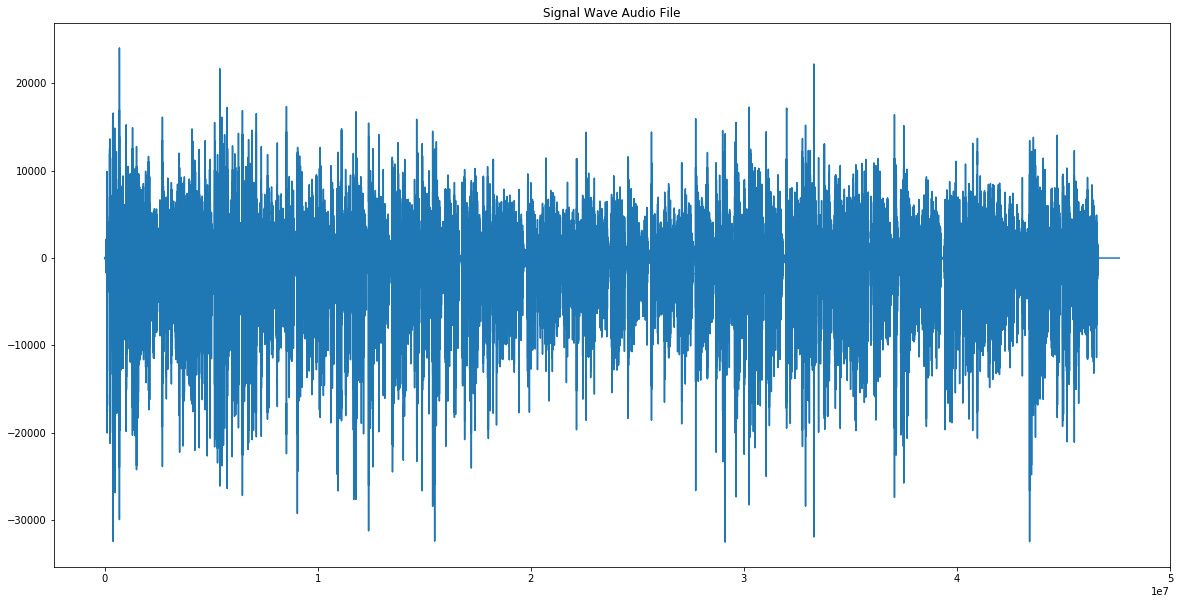

In [4]:
import matplotlib.pyplot as plt

# PLOT AUDIO WAVE 
spf = wave.open('./records/audio_slow.wav', "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")

print('\n PLot Signal Wave Audio')

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

plt.figure(1)
plt.figure(figsize=(20,10)) 
plt.title("Signal Wave Audio File")
plt.plot(signal)
plt.show()


A continuación se muestra el código que permite la conexión con **SpeechtoText**.

Es necesario destacar que "authenticator" contiene una clave personal obtenida desde **IBM Cloud** y que hace referencia al tipo de plan que se ha seleccionado.


In [5]:
from ibm_watson import SpeechToTextV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

# API -- IBM SPEECH-TO-TEXT 
authenticator = IAMAuthenticator('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX') # Insert key IBM SPEECH-TO-TEXT 
speech_to_text = SpeechToTextV1(authenticator=authenticator)

speech_to_text.set_service_url('https:xxxxxxxxxxxxxx') # Insert url IBM SPEECH-TO-TEXT 
print('Conexión: >------> OK')

Conexión: >------> OK


Para poder obtener correctamente la transcripción, es necesario configurar algunos de los parámetros internos de la petición a  **SpeechtoText**.

* Es necesario definir el tipo de audio de entrada, en este caso al ser un formato _".wav"_, la variable _"content_type"_ queda definida como 'audio/wav'
* Se asigna el modelo de reconocimiento de voz para un lenguaje determinado, en este caso español, cuyo parámetro está definido como 'es-ES_BroadbandModel'
* Activo la variable booleana _"word_confidence"_ que establece un valor comprendido entre 0 y 1 a la confianza asignada a cada una de las palabras.
* Activo la variable booleana _"timestamps"_ que permite determinar el segundo exacto en el que se ha detectado el inicio y el fin de una determinada palabra. 
* Activo la variable booleana _"smart_formatting"_ que permite transcribir a texto fechas, dígitos, números, teléfonos, direcciones de correo electrónico ...etc. 
* Activo la variable booleana "split_transcript_at_phrase_end" que permite separar la transcripción completa en frases. 

Tras estudiar detenidamente la documentación para esta solicitud, fue posible ver que contaba con una variable que permitía obtener la gramática para los archivos de audio, pero me fue imposible integrarlo en este proyecto ya que se trataba de una opción integrada dentro del plan de pago. 



In [6]:
from os.path import join, dirname
from pprint import pprint

# ¡¡¡¡ YOUR DIRNAME!!!!!
with open(join(dirname('/home/bryan/Documentos/EOI/NLP/records/'), './.', 'audio_slow.wav'),'rb') as audio_file:
   
    speech_recognition_results = speech_to_text.recognize(
    audio=audio_file,
    content_type='audio/wav',
    model='es-ES_BroadbandModel',
    word_confidence = True,
    timestamps = True,
    smart_formatting = True,
    speech_detector_sensitivity= 0.8,
    split_transcript_at_phrase_end = True
    ).get_result()
#pprint(dict(speech_recognition_results))

A continuación se muestra un fragmento del resultado obtenido para el archivo de audio completo _"audio_slow.wav"_ que se ha cargado:

_{'result_index': 0,
 'results': [{'alternatives': [{'confidence': 1.0,
                                'timestamps': [['dijimos', 0.99, 1.61],
                                               ['que', 2.4, 2.6],
                                               ['haríamos', 2.6, 3.3],
                                               ['lo', 3.3, 3.45],
                                               ['que', 3.45, 3.67],
                                               ['hiciera', 3.79, 4.24],
                                               ['falta', 4.24, 4.66],
                                               ['cuando', 4.66, 4.98],
                                               ['hiciera', 4.98, 5.25],
                                               ['falta', 5.25, 5.55],
                                               ['y', 5.55, 5.6],
                                               ['donde', 5.6, 5.85],
                                               ['hiciera', 5.85, 6.09],
                                               ['falta', 6.09, 6.43]],
                                'transcript': 'dijimos que haríamos lo que '
                                              'hiciera falta cuando hiciera '
                                              'falta y donde hiciera falta ',
                                'word_confidence': [['dijimos', 1.0],
                                                    ['que', 1.0],
                                                    ['haríamos', 1.0],
                                                    ['lo', 1.0],
                                                    ['que', 1.0],
                                                    ['hiciera', 1.0],
                                                    ['falta', 1.0],
                                                    ['cuando', 1.0],
                                                    ['hiciera', 1.0],
                                                    ['falta', 1.0],
                                                    ['y', 1.0],
                                                    ['donde', 1.0],
                                                    ['hiciera', 1.0],
                                                    ['falta', 1.0]]}],
              'end_of_utterance': 'full_stop',
              'final': True},
             {'alternatives': [{'confidence': 0.97,
                                'timestamps': [['las', 7.13, 7.33],
                                               ['empresas', 7.33, 7.83],
                                               ['y', 7.83, 7.88],
                                               ['el', 7.88, 7.95],
                                               ['conjunto', 7.95, 8.45],
                                               ['de', 8.45, 8.56],
                                               ['nuestro', 8.56, 9.07],
                                               ['tejido', 9.07, 9.48],
                                               ['productivo', 9.48, 10.32]],
                                'transcript': 'las empresas y el conjunto de '
                                              'nuestro tejido productivo ',
                                'word_confidence': [['las', 1.0],
                                                    ['empresas', 1.0],
                                                    ['y', 0.64],
                                                    ['el', 0.51],
                                                    ['conjunto', 1.0],
                                                    ['de', 1.0],
                                                    ['nuestro', 1.0],
                                                    ['tejido', 1.0],
                                                    ['productivo', 0.97]]}],
              'end_of_utterance': 'full_stop',
              'final': True},
             {'alternatives': [{'confidence': 0.94,
                                'timestamps': [['deben', 10.88, 11.38],
                                               ['sentirse', 11.38, 12.21],
                                               ['protegidas', 12.74, 13.56],
                                               ['y', 14.05, 14.15],
                                               ['por', 14.15, 14.35],
                                               ['eso', 14.35, 14.7],
                                               ['les', 14.86, 15.06],
                                               ['anunció', 15.06, 15.44],
                                               ['que', 15.44, 15.55],
                                               ['vamos', 15.55, 15.85],
                                               ['a', 15.85, 15.9],
                                               ['movilizar', 15.9, 16.55],
                                               ['hasta', 17.02, 17.35],
                                               ['doscientos', 17.35, 18.11],
                                               ['mil', 18.11, 18.45],
                                               ['millones', 18.48, 18.99],
                                               ['de', 18.99, 19.08],
                                               ['euros', 19.08, 19.61]],
                                'transcript': 'deben sentirse protegidas y por '
                                              'eso les anunció que vamos a '
                                              'movilizar hasta 200000000000 de '
                                              'euros ',
                                'word_confidence': [['deben', 1.0],
                                                    ['sentirse', 1.0],
                                                    ['protegidas', 0.67],
                                                    ['y', 0.98],
                                                    ['por', 1.0],
                                                    ['eso', 1.0],
                                                    ['les', 0.81],
                                                    ['anunció', 0.94],
                                                    ['que', 1.0],
                                                    ['vamos', 1.0],
                                                    ['a', 1.0],
                                                    ['movilizar', 0.94],
                                                    ['hasta', 1.0],
                                                    ['doscientos', 1.0],
                                                    ['mil', 1.0],
                                                    ['millones', 1.0],
                                                    ['de', 0.91],
                                                    ['euros', 0.94]]}],
              'end_of_utterance': 'full_stop',
              'final': True},
             {'alternatives': [{'confidence': 0.92,
                                'timestamps': [['repito', 19.64, 20.02],
                                               ['la', 20.02, 20.11],
                                               ['cifra', 20.11, 20.57],
                                               ['doscientos', 20.94, 21.51],
                                               ['mil', 21.51, 21.65],
                                               ['millones', 21.65, 22.05],
                                               ['de', 22.05, 22.13],
                                               ['euros', 22.13, 22.41],
                                               ['cerca', 22.41, 22.76],
                                               ['de', 22.76, 22.87],
                                               ['un', 22.87, 23.01],
                                               ['veinte', 23.01, 23.5],
                                               ['porciento', 23.5, 24.24],
                                               ['de', 24.64, 24.79],
                                               ['nuestra', 24.79, 25.15],
                                               ['capacidad', 25.15, 25.75],
                                               ['de', 25.75, 25.83],
                                               ['producción', 25.83, 26.51],
                                               ['de', 26.57, 26.71],
                                               ['riqueza', 26.71, 27.2],
                                               ['anual', 27.28, 27.66],
                                               ['de', 28.03, 28.12],
                                               ['nuestro', 28.12, 28.36],
                                               ['tipo', 28.36, 28.62]],
                                'transcript': 'repito la cifra 200000000000 de '
                                              'euros cerca de 120% de nuestra '
                                              'capacidad de producción de '
                                              'riqueza anual de nuestro tipo ',
                                'word_confidence': [['repito', 0.86],
                                                    ['la', 0.74],
                                                    ['cifra', 0.99],
                                                    ['doscientos', 0.98],
                                                    ['mil', 0.66],
                                                    ['millones', 1.0],
                                                    ['de', 1.0],
                                                    ['euros', 1.0],
                                                    ['cerca', 1.0],
                                                    ['de', 0.95],
                                                    ['un', 1.0],
                                                    ['veinte', 1.0],
                                                    ['porciento', 0.88],
                                                    ['de', 1.0],
                                                    ['nuestra', 1.0],
                                                    ['capacidad', 1.0],
                                                    ['de', 1.0],
                                                    ['producción', 0.99],
                                                    ['de', 1.0],
                                                    ['riqueza', 0.99],
                                                    ['anual', 0.56],
                                                    ['de', 0.75],
                                                    ['nuestro', 0.86],
                                                    ['tipo', 0.51]]}] ..._



<img src="pictures/Captura%20de%20pantalla%20de%202020-05-16%2017-30-15.png">

Como se puede ver, el resultado obtenido no es legible y es necesario tratarlo. Por este motivo, fue necesario programar un código que permitiese operar con esta información.

En primer lugar, es necesario definir el número de frases que se han transcrito a partir del audio completo. Cada una de las frases están integradas dentro de los items _"alternatives"_. Obtenida esta información, ya es posible codificar un bucle que permite extraer la transcripción completa y la confianza alcanzada para cada una de las frases.

Al compilar el siguiente código se obtiene:

* Transcripción completa del archivo de audio
* Representación gráfica del nivel de confianza alcanzado para la transcripción con  **SpeechtoText**
* Cada una de las frases con su respectivo nivel de confianza alcanzado (Si es menor de 0.9, de color rojo)
* Tabla resumen que contiene todas las palabras de cada una de las frases con su respectivo nivel de confianza, además de indicar el "segundo.milisegundo" (s.ms) exacto en el que empieza y termina.





Transcripción completa del audio

dijimos que haríamos lo que hiciera falta cuando hiciera falta y donde hiciera falta  las empresas y el conjunto de nuestro tejido productivo  deben sentirse protegidas y por eso les anunció que vamos a movilizar hasta 200000000000 de euros  repito la cifra 200000000000 de euros cerca de 120% de nuestra capacidad de producción de riqueza anual de nuestro tipo  117000000000 de euros serán íntegramente públicos 117000000000 de euros serán íntegramente públicos y el restante se complementará con la movilización de recursos privados  insisto  la mayor movilización de recursos económicos de la historia reciente de españa  de nuestra democracia  y en un corto espacio de tiempo muy corto espacio de tiempo  se trata de un esfuerzo enorme decidido que responde a la magnitud del desafío social y económico que nos estamos enfrentando  y también responde al compromiso del gobierno de españa con todos y cada uno de los ciudadanos  no vamos a escatimar ningún esfue

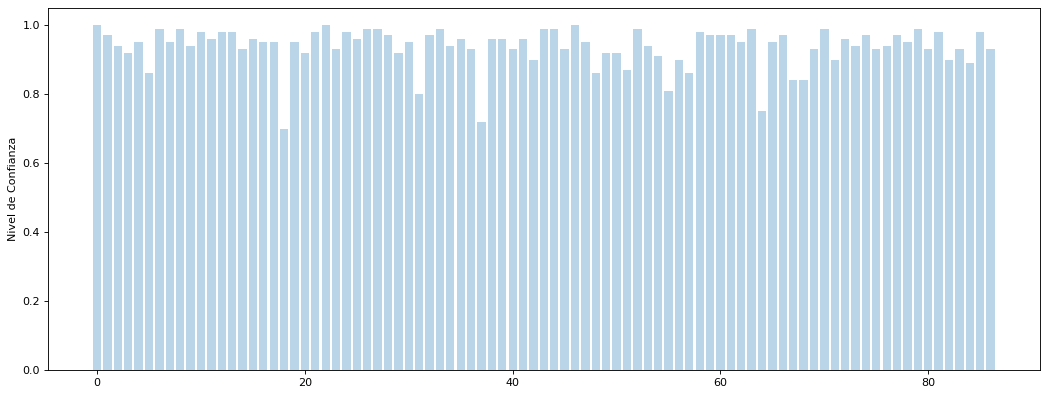

Según la gráfica obtenida, es posible afirmar que el nivel de confianza general es muy alto.

 Frase + Confianza 

dijimos que haríamos lo que hiciera falta cuando hiciera falta y donde hiciera falta CONFIANZA: 1.0

las empresas y el conjunto de nuestro tejido productivo CONFIANZA: 0.97

deben sentirse protegidas y por eso les anunció que vamos a movilizar hasta 200000000000 de euros CONFIANZA: 0.94

repito la cifra 200000000000 de euros cerca de 120% de nuestra capacidad de producción de riqueza anual de nuestro tipo CONFIANZA: 0.92

117000000000 de euros serán íntegramente públicos 117000000000 de euros serán íntegramente públicos y el restante se complementará con la movilización de recursos privados CONFIANZA: 0.95

insisto CONFIANZA: 0.86

la mayor movilización de recursos económicos de la historia reciente de españa CONFIANZA: 0.99

de nuestra democracia CONFIANZA: 0.95

y en un corto espacio de tiempo muy corto espacio de tiempo CONFIANZA: 0.99

se trata de un esfuerzo enorme de

Palabra  \
dijimos que haríamos lo que hiciera falta cuand... 0      dijimos   
                                                   1          que   
                                                   2     haríamos   
                                                   3           lo   
                                                   4          que   
                                                   5      hiciera   
                                                   6        falta   
                                                   7       cuando   
                                                   8      hiciera   
                                                   9        falta   
                                                   10           y   
                                                   11       donde   
                                                   12     hiciera   
                                                   13       falta   
las empresas y el conjunto de nuestro tejido pr... 0          las   
                                                   1     empresas   
                                                   2            y   
                                                   3           el   
                                                   4     conjunto   
                                                   5           de   
                                                   6      nuestro   
                                                   7       tejido   
                                                   8   productivo   
deben sentirse protegidas y por eso les anunció... 0        deben   
                                                   1     sentirse   
                                                   2   protegidas   
                                                   3            y   
                                                   4          por   
                                                   5          eso   
                                                   6          les   
                                                   7      anunció   
                                                   8          que   
                                                   9        vamos   
                                                   10           a   
                                                   11   movilizar   
                                                   12       hasta   
                                                   13  doscientos   
                                                   14         mil   
                                                   15    millones   
                                                   16          de   
                                                   17       euros   
repito la cifra 200000000000 de euros cerca de ... 0       repito   
                                                   1           la   
                                                   2        cifra   
                                                   3   doscientos   
                                                   4          mil   
                                                   5     millones   
                                                   6           de   
                                                   7        euros   
                                                   8        cerca   
                                                   9           de   
                                                   10          un   
                                                   11      veinte   
                                                   12   porciento   
                                                   13          de   
                                                   14     nuestra   
                                                   15   capacidad   
                                                   16   

In [7]:
from matplotlib.pyplot import figure

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

audio_timestamps = []
audio_total_sentence = []
audio_total_confidence = []
audio_word_confidence = []
#pprint(dict(speech_recognition_results))
string = str(speech_recognition_results) # dict to string
wordlist = string.split() # split words
wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

    # print("Pairs\n" + str(list(zip(wordlist, wordfreq))))

# Count word freq for "alternatives"
freq_word = wordfreq[2]

            
for i in range(freq_word):
    
    audio_total_sentence.append(speech_recognition_results['results'][i]['alternatives'][0]['transcript'])
    audio_total_confidence.append(speech_recognition_results['results'][i]['alternatives'][0]['confidence'])
    audio_timestamps.append(speech_recognition_results['results'][i]['alternatives'][0]['timestamps'])
    audio_word_confidence.append(speech_recognition_results['results'][i]['alternatives'][0]['word_confidence'])
    
print(color.BOLD+'\n'+'Transcripción completa del audio'+'\n'+color.END)    
df_transcrip = pd.DataFrame(list(zip(audio_total_sentence, audio_total_confidence)), columns= {'sentence','confidence'})

b = list(df_transcrip.sentence)
print(' '.join(word for word in b))
print('\n')

# ----------------------------------------------------------------------------------------------------------------        
        

print(color.BOLD+'Representación gráfica del nivel de confianza para cada frase:'+color.END)

figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
y_pos = np.arange(len(audio_total_sentence))
plt.bar(y_pos, audio_total_confidence , alpha=0.3)
plt.ylabel('Nivel de Confianza')
plt.show()

print(color.UNDERLINE+'Según la gráfica obtenida, es posible afirmar que el nivel de confianza general es muy alto.'+color.END)

# ----------------------------------------------------------------------------------------------------------------        
        

print(color.BOLD+ '\n Frase + Confianza \n'+ color.END)



a = list(zip(audio_total_sentence, audio_total_confidence))
for i in range(len(a)):
    sent_conf = a[i]
    if audio_total_confidence[i]>=0.9:
        print(sent_conf[0]+color.BLUE+color.BOLD+'CONFIANZA: '+str(sent_conf[1])+color.END+color.END+'\n')
    elif audio_total_confidence[i]<0.9:
        print(sent_conf[0]+color.RED+color.BOLD+'CONFIANZA: '+str(sent_conf[1])+color.END+color.END+'\n')

# ----------------------------------------------------------------------------------------------------------------        
print('\n'+color.BOLD+'Tabla Resumen'+color.END+'\n')

print(color.UNDERLINE+'Tabla resumen que contiene todas las palabras de cada una de las frases con su respectivo nivel de confianza y los segundos exactos entre los que está comprendido.'+color.END)        
word = []
init_word = []
end_word = []
conf_word = []
indice_1 = []
sentence  = []

for a in np.arange(len(audio_timestamps)):
    num_palab = audio_timestamps[a]
    conf_palab = audio_word_confidence[a]
    for b in np.arange(len(num_palab)):
        sentence.append(audio_total_sentence[a])
        indice_1.append(b)
        word.append(num_palab[b][0])
        init_word.append(num_palab[b][1])
        end_word.append(num_palab[b][2])
        conf_word.append(conf_palab[b][1])

        

index = list(zip(sentence,indice_1))
index = pd.MultiIndex.from_tuples(index)
pop = pd.Series(word,index=index)
pop_df = pd.DataFrame({'Palabra': pop,
                       's.ms Inicio':init_word ,
                       's.ms Fin' : end_word,
                       'Confianza' : conf_word })

num_palabras = 60
pop_df.head(num_palabras) 
        

Como se puede ver, el resultado obtenido de procesar el audio completo cargado en **SpeechtoText** de **IBM Cloud**  obtiene muy buenos resultados si nos fijamos directamente en el nivel de confianza alcanzado. Pero cuando se contrasta con el audio original, es posible observar que existe varios fallos en la trascripción, como por ejemplo "PIB", que no lo consigue identificar.  Este fallo se podría solucionar si se incluye esta palabra en la variable keyWords 

LLegado a este punto, surgió una nueva pregunta:

_Si evaluamos el mismo audio pero previamente fragmentado, en función de las pausas en las que no se produce una intervención._
__*¿Obtendríamos los mismos resultados?*__

Para dar respuesta a esta pregunta, se procedió a fragmentar el archivo de audio gracias al comando _"sox"_ que permite dividir el audio de forma automática en función de los silencios que encuentra en el audio. Obteniendo finalmente  195 archivos.

In [8]:
# split audio by silent

os.system('sox ./records/audio_slow.wav  ./records/splits/.wav silence 1 0.18 2% 1 0.3 2% : newfile : restart')

# show audio files, result of split 
list_audio=os.listdir('./records/splits/')
print(list_audio)

number_files = len(list_audio)
print('\n Number of audio files: ',number_files)


['016.wav', '162.wav', '005.wav', '189.wav', '146.wav', '165.wav', '154.wav', '008.wav', '161.wav', '105.wav', '152.wav', '109.wav', '006.wav', '142.wav', '103.wav', '169.wav', '111.wav', '024.wav', '125.wav', '133.wav', '194.wav', '101.wav', '077.wav', '123.wav', '033.wav', '190.wav', '173.wav', '070.wav', '095.wav', '025.wav', '185.wav', '147.wav', '126.wav', '044.wav', '121.wav', '003.wav', '163.wav', '122.wav', '018.wav', '150.wav', '135.wav', '114.wav', '038.wav', '079.wav', '176.wav', '080.wav', '053.wav', '046.wav', '156.wav', '011.wav', '187.wav', '149.wav', '036.wav', '129.wav', '192.wav', '141.wav', '043.wav', '041.wav', '004.wav', '097.wav', '089.wav', '180.wav', '081.wav', '175.wav', '054.wav', '002.wav', '159.wav', '015.wav', '140.wav', '145.wav', '178.wav', '072.wav', '068.wav', '074.wav', '100.wav', '158.wav', '094.wav', '143.wav', '045.wav', '160.wav', '001.wav', '184.wav', '151.wav', '059.wav', '116.wav', '131.wav', '058.wav', '093.wav', '039.wav', '063.wav', '021.wav'

Una vez que tenemos todos los archivos de audio, creo un código que envía cada uno de ellos a **SpeechtoText** y guardo el resultado obtenido de forma ordenada. 

Al contrario que en el estudio anterior, en esta ocasión no se activó todos los servicios disponibles de **SpecchtoText**, además de enviar solo los primeros 40 archivos de audio para reducir el tiempo de espera. Si se desea activar los servicios, tan solo es necesario incluir los comandos descritos en el anterior estudio. 

Para ejecutar este código, es necesario haber compilado el comando en el cual me identifico en **IBM Cloud**



In [9]:
from os.path import join, dirname
from pprint import pprint
import pandas as pd


sentence = []
confidence = []
init_count = 0   
for a in range(1,40): #number_files+1
    if a < 10:
        audio_name = '00'+str(a)+'.wav'
        
        #Stream needs to be at least 100 bytes for speech to text processing

        if os.path.getsize('./records/splits/'+audio_name)>=100:
#            print(audio_name)
# ¡¡¡¡ YOUR DIRNAME!!!!!
            with open(join(dirname('/home/bryan/Documentos/EOI/NLP/records/splits/'), './.', audio_name),'rb') as audio_file:
                speech_recognition_results = speech_to_text.recognize(
                audio=audio_file,
                content_type='audio/wav',
                model='es-ES_BroadbandModel',
               # word_alternatives_threshold=0.9, # indica el nivel de confianza minimo admitido
                profanity_filter = True,
                smart_formatting = True,
                redaction = True,
                speech_detector_sensitivity= 0.8,
                split_transcript_at_phrase_end = True
                ).get_result()

            #pprint(dict(speech_recognition_results))
            string = str(speech_recognition_results) # dict to string
            wordlist = string.split() # split words
            wordfreq = []
            for w in wordlist:
                wordfreq.append(wordlist.count(w))

            # print("Pairs\n" + str(list(zip(wordlist, wordfreq))))

            # Count word freq for "alternatives"
            freq_word = wordfreq[2]
            
            # wordfreq == '[1, 1, 1, 1]' means no text in audio file

            
            if str(wordfreq) != '[1, 1, 1, 1]':
                #print('freq_word:',freq_word)
                counter = init_count +freq_word
                #print('counter', counter)
                #print('init_count',init_count)
                # select transcript and confidence

                for i in range(init_count,counter):
                    sentence.append(speech_recognition_results['results'][i-init_count]['alternatives'][0]['transcript'])
                    confidence.append(speech_recognition_results['results'][i-init_count]['alternatives'][0]['confidence'])
            
                init_count = counter 
                #print('init_count:', init_count)
    else :
        
        audio_name = '0'+str(a)+'.wav'
        
#        print(audio_name, os.path.getsize('./records/splits/'+audio_name) )
        
        #Stream needs to be at least 100 bytes for speech to text processing
        if  os.path.getsize('./records/splits/'+audio_name)>=100:
           # ¡¡¡¡ YOUR DIRNAME!!!!!
            with open(join(dirname('/home/bryan/Documentos/EOI/NLP/records/splits/'), './.', audio_name),'rb') as audio_file:
                speech_recognition_results = speech_to_text.recognize(
                audio=audio_file,
                content_type='audio/wav',
                model='es-ES_BroadbandModel',
               # word_alternatives_threshold=0.9, # indica el nivel de confianza minimo admitido
                profanity_filter = True,
                smart_formatting = True,
                redaction = True,
                speech_detector_sensitivity= 0.8,
                split_transcript_at_phrase_end = True
                ).get_result()

            #pprint(dict(speech_recognition_results))
            string = str(speech_recognition_results) # dict to string
            wordlist = string.split() # split words
            wordfreq = []
            for w in wordlist:
                wordfreq.append(wordlist.count(w))

            # print("Pairs\n" + str(list(zip(wordlist, wordfreq))))

            # Count word freq for "alternatives"
            freq_word = wordfreq[2]
            
            if str(wordfreq) != '[1, 1, 1, 1]':
                #print('freq_word:',freq_word)
                counter = init_count +freq_word
                #print('counter', counter)
                #print('init_count',init_count)
                # select transcript and confidence

                for i in range(init_count,counter):
                    sentence.append(speech_recognition_results['results'][i-init_count]['alternatives'][0]['transcript'])
                    confidence.append(speech_recognition_results['results'][i-init_count]['alternatives'][0]['confidence'])
            
                init_count = counter 
                #print('init_count:', init_count)


Tal y como ocurrió en el caso anterior, el resultado obtenido es una cadena de texto difícil de interpretar a simple vista, de forma que nuevamente es necesario tratarla.

hicimos  que haríamos lo que hiciera falta cuando hiciera falta y donde hiciera falta  las empresas y el conjunto de nuestro tejido productivo  deben sentirse  2  uso  es anuncio que vamos a movilizar  en 2000000000 de euros  en 0 de euros cerca de 120%  nuestra capacidad de producción de riqueza anual  17000000000 de euros serán  íntegramente publicó  117000000000 de euros serán íntegramente públicos  el restante  lamentará  la movilización de recursos privados  insisto  la mayor movilización de recursos económicos  la historia reciente de españa  nuestra  en un corto  muy corto espacio de  se trata de un esfuerzo  enorme  responde a la magnitud del desafio  salir con un chico al que nos estamos enfrentando  también responde al compromiso del gobierno de españa  cada uno de los 100  no vamos a escatimar ningún esfuerzo ninguno  nadie se va a quedar atrás  no vamos a dejar a nadie atrás  el 20  a los que ahora van a necesitar  mucha más protección  ellos son los más vulnerables a los m

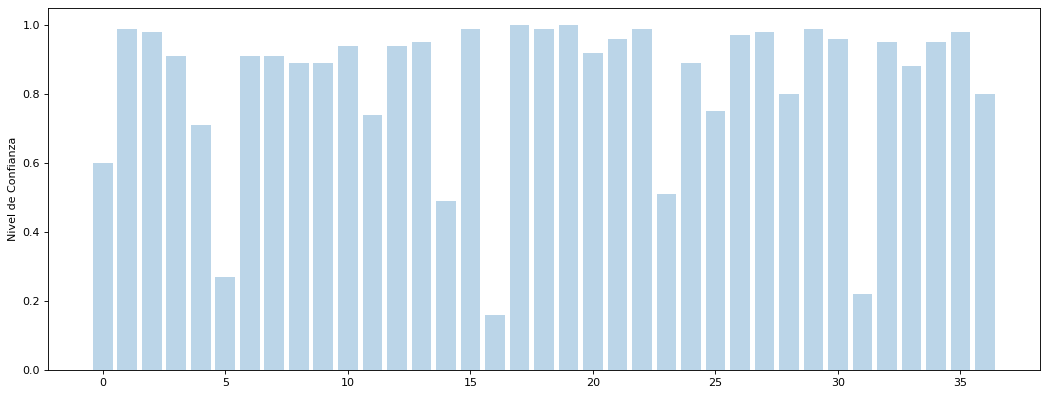

Frase + Accuracy 

hicimos CONFIANZA: 0.6

que haríamos lo que hiciera falta cuando hiciera falta y donde hiciera falta CONFIANZA: 0.99

las empresas y el conjunto de nuestro tejido productivo CONFIANZA: 0.98

deben sentirse CONFIANZA: 0.91

2 CONFIANZA: 0.71

uso CONFIANZA: 0.27

es anuncio que vamos a movilizar CONFIANZA: 0.91

en 2000000000 de euros CONFIANZA: 0.91

en 0 de euros cerca de 120% CONFIANZA: 0.89

nuestra capacidad de producción de riqueza anual CONFIANZA: 0.89

17000000000 de euros serán CONFIANZA: 0.94

íntegramente publicó CONFIANZA: 0.74

117000000000 de euros serán íntegramente públicos CONFIANZA: 0.94

el restante CONFIANZA: 0.95

lamentará CONFIANZA: 0.49

la movilización de recursos privados CONFIANZA: 0.99

insisto CONFIANZA: 0.16

la mayor movilización de recursos económicos CONFIANZA: 1.0

la historia reciente de españa CONFIANZA: 0.99

nuestra CONFIANZA: 1.0

en un corto CONFIANZA: 0.92

muy corto espacio de CONFIANZA: 0.96

se trata de un esfuerzo CONFIANZA

In [10]:
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

    
a = pd.DataFrame( list(zip(sentence,confidence))  , columns = ['sentence','confidence'])                
b = list(a.sentence)
print(' '.join(word for word in b))


print('\n')


print(color.BOLD+'Representación gráfica del nivel de confianza para cada frase:'+color.END)

figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
y_pos = np.arange(len(sentence))
plt.bar(y_pos, confidence , alpha=0.3)
plt.ylabel('Nivel de Confianza')
plt.show()


print(color.BOLD+ 'Frase + Accuracy \n'+ color.END)

a = list(zip(sentence, confidence))
for i in range(len(a)):
    sent_conf = a[i]
    if confidence[i]>=0.9:
        print(sent_conf[0]+color.BLUE+color.BOLD+'CONFIANZA: '+str(sent_conf[1])+color.END+color.END+'\n')
    elif confidence[i]<0.9:
        print(sent_conf[0]+color.RED+color.BOLD+'CONFIANZA: '+str(sent_conf[1])+color.END+color.END+'\n')

Como se puede ver en la gráfica que muestra la confianza asignada a cada una de las frases,  la confianza de la transcripción a nivel general se ve reducida en gran medida. No es posible afirmar que la transcripción es idéntica al mensaje de cada uno de los fragmentos de audio. Cuando se evalúa el resultado obtenido con los archivos de audio fragmentados, en algunas ocasiones existe una gran diferencia y la transcripción no se asemeja al contenido del audio.


Antes estos resultados, es posible afirmar que es mejor enviar archivos de audio completos a **SpeechtoText** a pesar de que su tiempo de procesamiento se vea notablemente incrementado. Dentro de este servicio, es posible definir los tiempos de espera entre cada una de las frases, aunque haciendo varios testeos fue posible observar que el valor que está definido por defecto funciona muy bien.

### **Natural Language Understanding-qw**

Obtenida la transcripción completa de la rueda de prensa de Pedro Sánchez del primer análisis, gracias al audio completo en **SpeechtoText**, surgió la idea de analizar el contenido del mismo mediante otra de las herramientas presentes en **IBM Cloud**. Esta opción era muy arriesgada de analizar puesto que la transcripción no contenía signos de puntuación que delimitara la longitud de cada una de las frases. Esta situación se podría resolver de forma manual, poniendo los puntos finales a cada una de las frases, pero en el desarrollo de este trabajo opté por automatizar todo, evitar la intervención humana. 

Ante esta situación, procedí a evaluar el servicio de comprensión del lenguaje natural gracias a **Natural Languague Understanding-qw** que pemite interpretar un mensaje, extraer palabras clave o hacer un análisis sintáctico, aunque esta última opcion no pude estudiarla puesto que pertenecían a un plan de pago al igual que otras opciones más interesantes presentes en esta herramienta, alguna de las cuales solo estaban disponibles para analizar texto en inglés.

Para utilizar este servicio, era necesario tener como "input" un fragmento de texto que sería estudiado por **Natural Languague Understanding-qw**. Tras pensar en distintas opciones, finalmente me decanté por tomar los párrafos presentes dentro de la noticia que se está estudiando en este _notebook_.

Para poder acceder a este contenido, era necesario hacer _"Scraping"_ a la página web, obteniendo los siguientes resultados:





In [11]:
import urllib
import pandas as pd
from bs4 import BeautifulSoup
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Scraping de la página web
url = 'https://elpais.com/economia/2020-03-17/el-gobierno-aprobara-una-moratoria-para-el-pago-de-hipotecas.html'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)

tags =soup.find_all('p', class_ = '')

# Extracción de los párrafos
parrafos = []
for e in range(len(tags)):
    parrafos.append(tags[e].contents[0])
    
print('\n \t '+color.BOLD+color.UNDERLINE+'NOTICIA COMPLETA'+color.END+color.END+'\n')
    
for o in range(len(parrafos)):
    print(color.BOLD+'Parrafo '+str(o)+' '+color.END+parrafos[o]+ '\n')


 	 NOTICIA COMPLETA

Parrafo 0 200.000 millones de euros. La cifra marea. Casi el 20% del PIB. Cuesta imaginarla. Supera con mucho lo que España gasta en un año en pagar todas las pensiones públicas. Pero esa cifra, la cantidad que ha anunciado el presidente del Gobierno, Pedro Sánchez, que pretende movilizar entre fondos públicos, 117.000 millones, y privados, da una idea del golpe que se espera que aseste la crisis sanitaria del coronavirus a la economía española. Un banquero de inversión habla este martes de un impacto equiparable al de un meteorito. “Son días muy duros”, ha argumentado Sánchez cuando ha salido a explicar las medidas que componen el segundo paquete de alivio.

Parrafo 1 “Son tiempos extraordinarios que requieren medidas extraordinarias”, ha añadido el presidente, antes de desgranar un paquete que pretende, en primer lugar, “dar a las empresas toda la liquidez que necesiten” con una “línea de avales de hasta 100.000 millones”. “El resto se completará con recursos pr

Estos párrafos son los que se han extraido de la noticia, aunque solo utilizaré el primero como input.

Para acceder a **Natural Languague Understanding-qw**, en primer lugar es necesario identificarnos con _"IAMAuthenticator"_

In [12]:
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')# Remplazar
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2019-07-12',
    authenticator=authenticator
)

natural_language_understanding.set_service_url('https:xxxxxxxxxxxxxxxxxxx') # 


Permitido el acceso para el uso de este servicio, es necesario configurar las distintas opciones que tiene disponible **Natural Languague Understanding-qw**. En este caso solo he configurado las opciones que estan disponibles en el plan gratuito de **IBM Cloud**, pero describiré también las opciones que me han parecido más interesantes del plan de pago o que no están disponibles en español.

* Categorías: clasifica el contenido introducido en función de una tabla de 5 niveles según un criterio establecido por IBM Cloud  
* _"Emotions"_ , Detecta el miedo, disgusto, enfado que transmite el contenido general del texto introducido, no está disponible en español
* _"Entities"_ , permite identificar personas, ciudades, organizaciones y otras entidades en el contenido.
*  _"Keywords"_ , identifica las palabras más importantes del contenido.
* _"SemanticRoles"_ : Analiza las oraciones en sujeto, acción y objeto, pero solo está disponible en inglés

El siguiente código muestra los parámetros de configuración que se activaron en **Natural Languague Understanding-qw** para poder ejecutarlo, además de identificar el párrafo que sería analizado. El índice que identifica al párrafo puede modificarse sin problema.

In [13]:
from ibm_watson.natural_language_understanding_v1 import Features, SyntaxOptions,CategoriesOptions,RelationsOptions
from ibm_watson.natural_language_understanding_v1 import  EntitiesOptions, KeywordsOptions, SemanticRolesOptions


for i in range(len(parrafos)):
    response = natural_language_understanding.analyze(
    text= parrafos[0] , # indice [0-10]
    return_analyzed_text = True,
    features=Features(  
        entities=EntitiesOptions(emotion=True, sentiment=True),
        keywords=KeywordsOptions(emotion=True, sentiment=True),
        categories = CategoriesOptions(),
        relations = RelationsOptions()
    )).get_result()


 Al igual que ocurrió en el anterior servicio de **IBM Cloud**, el resultado obtenido vuelve a ser una cadena de texto que es difícil de tratar a simple vista, de forma que es necesario procesarlo.
 
 
{'usage': {'text_units': 1, 'text_characters': 656, 'features': 4},
 'relations': [{'type': 'agentOf',
   'sentence': 'Pero esa cifra, la cantidad que ha anunciado el presidente del Gobierno, Pedro Sánchez, que pretende movilizar entre fondos públicos, 117.000 millones, y privados, da una idea del golpe que se espera que aseste la crisis sanitaria del coronavirus a la economía española.',
   'score': 0.468748,
   'arguments': [{'text': 'presidente',
     'location': [217, 227],
     'entities': [{'type': 'Person', 'text': 'Pedro Sánchez'}]},
    {'text': 'anunciado',
     'location': [204, 213],
     'entities': [{'type': 'EventCommunication', 'text': 'anunciado'}]}]},
  {'type': 'managerOf',
   'sentence': 'Pero esa cifra, la cantidad que ha anunciado el presidente del Gobierno, Pedro Sánchez, que pretende movilizar entre fondos públicos, 117.000 millones, y privados, da una idea del golpe que se espera que aseste la crisis sanitaria del coronavirus a la economía española.',
   'score': 0.373341,
   'arguments': [{'text': 'presidente',
     'location': [217, 227],
     'entities': [{'type': 'Person', 'text': 'Pedro Sánchez'}]},
    {'text': 'Gobierno',
     'location': [232, 240],
     'entities': [{'type': 'GeopoliticalEntity',
       'text': 'Gobierno',
       'disambiguation': {'subtype': ['Country']}}]}]}],
 'language': 'es',
 'keywords': [{'text': 'cifra marea',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.835936,
   'count': 1},
  {'text': 'Pedro Sánchez',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.804559,
   'count': 1},
  {'text': 'fondos públicos',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.701835,
   'count': 1},
  {'text': 'presidente del Gobierno',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.653491,
   'count': 1},
  {'text': 'banquero de inversión',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.652871,
   'count': 1},
  {'text': 'economía española',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.575749,
   'count': 1},
  {'text': 'pensiones públicas',
   'sentiment': {'score': 0.501947, 'label': 'positive'},
   'relevance': 0.569392,
   'count': 1},
  {'text': 'idea del golpe',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.565924,
   'count': 1},
  {'text': 'crisis sanitaria del coronavirus',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.511291,
   'count': 1},
  {'text': 'martes de un impacto equiparable',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.484367,
   'count': 1},
  {'text': 'segundo paquete de alivio',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.462223,
   'count': 1},
  {'text': 'cantidad',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.41784,
   'count': 1},
  {'text': 'cifra',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.41324,
   'count': 1},
  {'text': 'España',
   'sentiment': {'score': 0.501947, 'label': 'positive'},
   'relevance': 0.392629,
   'count': 1},
  {'text': 'Sánchez',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.388216,
   'count': 1},
  {'text': 'medidas',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.380948,
   'count': 1},
  {'text': 'año',
   'sentiment': {'score': 0.501947, 'label': 'positive'},
   'relevance': 0.38052,
   'count': 1},
  {'text': 'meteorito',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.370365,
   'count': 1},
  {'text': 'PIB',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.370365,
   'count': 1},
  {'text': 'euros',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.370365,
   'count': 1}],
 'entities': [{'type': 'Quantity',
   'text': '20%',
   'sentiment': {'score': 0.0, 'label': 'neutral'},
   'relevance': 0.954265,
   'count': 1},
  {'type': 'Person',
   'text': 'Pedro Sánchez',
   'sentiment': {'score': 0.0, 'label': 'neutral'},
   'relevance': 0.709193,
   'count': 1},
  {'type': 'Location',
   'text': 'España',
   'sentiment': {'score': 0.0, 'label': 'neutral'},
   'relevance': 0.356385,
   'disambiguation': {'subtype': ['Country']},
   'count': 1},
  {'type': 'Person',
   'text': 'Sánchez',
   'sentiment': {'score': 0.0, 'label': 'neutral'},
   'relevance': 0.085809,
   'count': 1}],
 'categories': [{'score': 0.8312, 'label': '/society/work/unemployment'},
  {'score': 0.791686, 'label': '/finance/investing/funds'},
  {'score': 0.732355, 'label': '/finance/investing/beginning investing'}],
 'analyzed_text': '200.000 millones de euros. La cifra marea. Casi el 20% del PIB. Cuesta imaginarla. Supera con mucho lo que España gasta en un año en pagar todas las pensiones públicas. Pero esa cifra, la cantidad que ha anunciado el presidente del Gobierno, Pedro Sánchez, que pretende movilizar entre fondos públicos, 117.000 millones, y privados, da una idea del golpe que se espera que aseste la crisis sanitaria del coronavirus a la economía española. Un banquero de inversión habla este martes de un impacto equiparable al de un meteorito. “Son días muy duros”, ha argumentado Sánchez cuando ha salido a explicar las medidas que componen el segundo paquete de alivio.'}

<img src="pictures/rsz_whatsapp_image_2020-05-22_at_211924.jpg">

Después de evaluar el contenido de varias consultas que hacían referencia a distintos párrafos, fue posible determinar que el resultado obtenido en cada uno de ellos era diferente, la estructura de salida generada varía notablemente. Esto puede deberse a que **Natural Languague Understanding-qw** en algunas ocasiones no consigue identificar determinadas características que han sido activadas en sus parámetros de configuración. 

Ante esta situación, no fue posible generar un código genérico que permitiese recuperar toda la información generada por este servicio de **IBM Cloud**. (Una posible forma de recuperar toda esta información sería mediante la codificación de un algoritmo que empleé expresiones regulares para extraer todo el contenido.)  

Por este motivo, finalmente me decanté por evaluar el párrafo que más contenido presentaba, siendo este el primer párrafo. El siguiente código extrae toda la información generada por **Natural Languague Understanding-qw**:

* Párrafo principal que ha sido evaluado
* Características principales de este "input"
* Generación de relaciones del contenido del párrafo
* Palabras clave identificadas


In [14]:
# Representación de los resultados:        
print('\n'+color.BOLD+response['analyzed_text']+color.END)

print('\n'+color.BOLD+'Características del texto introducido'+color.END)
print('\n text_units:',response['usage']['text_units'],\
      '\t text_characters:',response['usage']['text_characters'],\
      '\t features:',response['usage']['features'])

print('\n'+color.BOLD+'Relaciones Generadas'+color.END)

print('\n'+color.UNDERLINE+\
      'Identifica entidades dentro del texto introducido, generando una frase que las relaciona'+color.END)
for a in range(len(response['relations'])):
    print(color.BOLD+'\n \t Propuesta:'+color.END,a+1)
    print('\n type:',response['relations'][a]['type'],'\t score:',response['relations'][a]['score'] )
    print('\n sentence:',response['relations'][a]['sentence'])
    
    for e in range(len(response['relations'][a]['arguments'])):
        print('\n entities.text:',response['relations'][a]['arguments'][e]['text'],\
             '\t entities.location:',response['relations'][a]['arguments'][e]['location'])
        print('\n entities.type:',response['relations'][a]['arguments'][e]['entities'][0]['type'],\
             '\t entities.text:',response['relations'][a]['arguments'][e]['entities'][0]['text'])    
    
    
    
print('\n'+color.BOLD+'Categorías Identificadas'+color.END)

for e in range(len(response['categories'])):
    print('\n Score:',response['categories'][e]['score'],'\t label:',response['categories'][e]['label'])


    
keywords = []
sentiment= []
label = []
relevance = []
sentence=[]
indice =[]
entities = []
categories = []
    
for i in range(len(response['keywords'])):
        indice.append(i+1)
        keywords.append(response['keywords'][i]['text'])
        sentiment.append(response['keywords'][i]['sentiment']['score'])
        label.append(response['keywords'][i]['sentiment']['label'])
        relevance.append(response['keywords'][i]['relevance'])
        sentence.append(response['analyzed_text'])

print('\n'+color.BOLD+'Keywords'+color.END)
        
df_keywords = pd.DataFrame(list(zip(keywords,sentiment,label,relevance)),columns={'keywords','sentiment',\
                                                                                  'label','relevance'})
df_keywords


200.000 millones de euros. La cifra marea. Casi el 20% del PIB. Cuesta imaginarla. Supera con mucho lo que España gasta en un año en pagar todas las pensiones públicas. Pero esa cifra, la cantidad que ha anunciado el presidente del Gobierno, Pedro Sánchez, que pretende movilizar entre fondos públicos, 117.000 millones, y privados, da una idea del golpe que se espera que aseste la crisis sanitaria del coronavirus a la economía española. Un banquero de inversión habla este martes de un impacto equiparable al de un meteorito. “Son días muy duros”, ha argumentado Sánchez cuando ha salido a explicar las medidas que componen el segundo paquete de alivio.

Características del texto introducido

 text_units: 1 	 text_characters: 656 	 features: 4

Relaciones Generadas

Identifica entidades dentro del texto introducido, generando una frase que las relaciona

 	 Propuesta: 1

 type: agentOf 	 score: 0.468748

 sentence: Pero esa cifra, la cantidad que ha anunciado el presidente del Gobierno, Pe

,relevance,keywords,sentiment,label
0,cifra marea,0.000000,neutral,0.835936
1,Pedro Sánchez,0.000000,neutral,0.804559
2,fondos públicos,0.000000,neutral,0.701835
3,presidente del Gobierno,0.000000,neutral,0.653491
4,banquero de inversión,0.000000,neutral,0.652871
5,economía española,0.000000,neutral,0.575749
6,pensiones públicas,0.501947,positive,0.569392
7,idea del golpe,0.000000,neutral,0.565924
8,crisis sanitaria del coronavirus,0.000000,neutral,0.511291
9,martes de un impacto equiparable,0.000000,neutral,0.484367


Después de realizar una gran cantidad de consultas modificando distintos parámetros, fue posible determinar que esta herramienta ofrece sus mejores servicios (como puede ser la evaluación sintáctica, entre otros) en su plan de pago, además de presentar mejores resultados en inglés. 

### Detección de sentimientos

Para complementar el análisis de la noticia, el siguiente paso fue observar las emociones o sentimientos presentes en los comentarios generados a raíz de esta publicación. Si se accede al enlace, es posible identificar más de 2800 comentarios, los cuales se encontraban protegidos y resultó imposible hacer _"Scraping"_ para su obtención. Ante esta situación, procedí a extraer de forma manual 200 comentarios, guardándose dentro del archivo "comentarios.txt".

Todos estos comentarios, a simple vista, para cualquier lenguaje de programación son una cadena de caracteres cuyo contenido no cuenta con sentido. Es imposible identificar el tipo de emoción o sentimiento presente en el texto.


<img src="pictures/rsz_vader_1.jpg">


Analizar el sentimiento de un texto es un proceso complejo, no es tan simple como identificar las palabras clave, sino que requiere que una persona lea detenidamente el contenido y lo interprete con el fin de añadir una etiqueta que identifique el sentimiento.(Solo contemplaré los sentimientos positivos y negativos.)

En este caso, realizar esta acción para los 200 comentarios era una tarea hercúlea, motivo por el cual procedí a buscar sistemas automatizados que permitieran interpretar el contexto y atribuir un verdadero significado contemplando siempre que muchos de estos sistemas pasan por alto el "matiz" de la comunicación humana.(Como por ejemplo la ironía.)

El sistema automatizado seleccionado ha sido **TextBlob**, que es una librería de Python que permite el procesamiento de textos mediante el uso de una API que realiza el análisis de sentimientos o el etiquetado sintáctico entre otras opciones.Para poder hacer uso de esta librería, era necesario traducir previamente todos los comentarios a Inglés puesto que es el único idioma admitido.

Para poder hacer la traducción, se volvió a recurrir a la plataforma de **IBM Cloud**, empleando en este caso el servicio **LanguageTranslatorV3** que no cuenta con parámetros de configuración.

Puesto que los comentarios son personales, asociados a cuentas existentes, era necesario preservar el anonimato de los mismos. Para asegurar esta condición recurrí a un random que selecciona 4 comentarios al azar del archivo "comentarios.txt" en función del valor de la semilla que se ha especificado. 

Estos comentarios traducidos a inglés son los que se han tomado como "input" en **TextBlob**, ejecutando las configuraciones de "sentiment" que determina el sentimiento del comentario y "tags" que etiqueta la sintaxis.  

* "sentiment": Devuelve una métrica de polaridad que va desde -1(para sentimiento negativos) a +1(para sentimientos positivos) y otra métrica de subjetividad que va de 0 a 1 (una puntuación más baja denota una lectura más precisa)

* "tags": Devuelve el etiquetado sintáctico para los comentarios en inglés. 

El siguiente código realiza todas las acciones que se han descrito, donde se ha remarcado los comentarios que han sido definidos como positivos de color azul y los comentarios definidos como negativos de color rojo, además de describir los tags asociados a cada palabra. 


In [15]:
import random
import json
from ibm_watson import LanguageTranslatorV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from textblob import TextBlob

import pandas as pd

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
# Leo los tags    
colnames=['tag', 'desc'] 
tags_file = pd.read_csv('tags.csv', names=colnames, header=None)    



# IDENTIFICACIÓN CON IBM Cloud     
authenticator = IAMAuthenticator('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx') # remplazar
language_translator = LanguageTranslatorV3(
    version='2018-05-01',
    authenticator=authenticator
)

language_translator.set_service_url('https:xxxxxxxxxxxxxx') # 

# LEO LOS COMENTARIOS GUARDADOS
comentarios = []
f = open("comentarios.txt","r")

for line in f.read().split('\n'):
    comentarios.append(line)

random.seed(29) # semilla random se puede cambiar


# selecciono 5 comentarios aleatorios
sampling = random.choices(comentarios, k=4) # k= num comentarios evaluados , se puede modificar
todo = []

# CONEXIÓN CON LA API TRANSLATE
for a in range(len(sampling)):
    translation = language_translator.translate(
    text=sampling[a],
    model_id='es-en').get_result()
    todo.append(translation)
# TRATAMIENTO DE LOS DATOS OBTENIDOS
trad_coment = []   
for b in range(len(todo)):
    print('\n'+color.BOLD+'Comentario '+str(b+1)+'\n'+sampling[b]+color.END)
    traduc = todo[b]['translations'][0]['translation']
    print('\n \t Traducción: \n'+traduc)
    trad_coment.append(traduc)
    for c in range(len(trad_coment)):
        eng_coment=trad_coment[c]
        analysis = TextBlob(eng_coment)  
        
    print('\n \t Sentimiento')
    if analysis.sentiment[0] > 0:
        print('\t polarity = '+color.BLUE+str(analysis.sentiment[0])+color.END+\
             '\t subjectivity = '+str(analysis.sentiment[1]))
    elif analysis.sentiment[0] <= 0:
        print('\t polarity = '+color.RED+str(analysis.sentiment[0])+color.END+\
             '\t subjectivity = '+str(analysis.sentiment[1]))
    
    print('\n \t Tags:')
    for d in range(len(analysis.tags)):
        for e in range(len(tags_file['tag'])):
            if str(analysis.tags[d][1]) == tags_file['tag'][e]:
                print('\t'+str(analysis.tags[d][0])+\
                      '\t \t'+str(analysis.tags[d][1])+\
                     '\t'+tags_file['desc'][e])    


Comentario 1
Pedro, deja a los bolivarianos, secesionistas y comunistas y acuerda con el PP, España te lo agradecerá y mucho antes saldremos de ésta

 	 Traducción: 
Pedro, leave the Bolivarians, secessionists and communists and agree with the PP, Spain will thank you and much sooner we will leave this

 	 Sentimiento
	 polarity = 0.2	 subjectivity = 0.2

 	 Tags:
	Pedro	 	NNP	 sustantivo propio singular
	leave	 	VBP	 verbo como presente
	the	 	DT	 Determinador
	Bolivarians	 	NNPS	 sustantivo propio plural
	secessionists	 	NNS	 sustantivo plural
	and	 	CC	 Conjunción de coordinación
	communists	 	NNS	 sustantivo plural
	and	 	CC	 Conjunción de coordinación
	agree	 	VBP	 verbo como presente
	with	 	IN	 preposición/junta subordinación
	the	 	DT	 Determinador
	PP	 	NNP	 sustantivo propio singular
	Spain	 	NNP	 sustantivo propio singular
	will	 	MD	 modal
	thank	 	VB	 verbo
	you	 	PRP	 pronombre personal
	and	 	CC	 Conjunción de coordinación
	much	 	JJ	 Adjetivo
	sooner	 	NN	 sustantivo s

Como se puede ver en los resultados obtenidos, la identificación del sentimiento de cada uno de los comentarios es peculiar puesto que no identifica el sentido exacto.  El comentario 3 identifica a la perfección el sentimiento negativo del texto, mientras que el comentario 4 es identificado como positivo cuando en realidad es un comentario crítico que debería ser catalogado como negativo. 

Para mejorar estos resultados, tal y como se comentó al principio de este apartado, sería necesario evaluar el sentimiento de cada uno de los comentarios y asignarles una etiqueta que sería de gran ayuda para entrenar un modelo que permitiese identificar el sentimiento con mayor precisión. 

### Conclusiones 

* Después de analizar las distintas ramas del procesamiento del lenguaje natural, es posible asegurar que es un campo que aún está por madurar. Es muy complicado asegurar que la precisión del resultado obtenido sea completamente de fiar. 

* Por otro lado, existen muchas limitaciones con el lenguaje en español puesto que la mayoría de las herramientas estaban únicamente disponibles para ser evaluadas en inglés. 

* El ecosistema de **IBM Cloud** es muy variado, dispone de cientos de servicios cuya versión gratuita es muy completa y dinámica. Toda la documentación está perfectamente actualizada y muy bien referenciada. 

* Trabajar con archivos de audio es sumamente delicado, es necesario tener en cuenta las frecuencias en las que están grabadas, la variedad de las pausas entre intervenciones para poder fragmentarlo, el ruido de fondo... etc. Todo esto limita la precisión de la transcripción final obtenida.  

* Evaluar párrafos muy grandes en la mayoría de los casos limita la precisión, así como la comprensión del mensaje. 

* Como trabajos futuros, se podría evaluar otros métodos de análisis de sentimiento, así como la investigación de otras ramas del procesamiento del lenguaje natural. Un ejemplo sería la codificación de un programa que permitiese interactuar con un chatbox empleando únicamente archivos de audio. (Similar a un asistente por voz.)

